# <font color ='plum'> Input - Output NN ~ Linear Regression w/ MSE optimizer </font>

In [1]:
%%time
from datetime import datetime
a = datetime.now()

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("afmhot")
# sns.set_palette("twilight")
# sns.set_style("darkgrid",{"axes.facebolor":"0.90"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":1.5})
sns.set_style("whitegrid")
import pylab
pylab.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')


import tensorflow as tf
print("# GPUs: ", len(tf.config.experimental.list_physical_devices("GPU")))
import numpy as np
import tensorflow.keras as tfk
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# GPUs:  1
CPU times: total: 5.95 s
Wall time: 6.57 s


In [2]:
df = pd.read_csv("C:/Users/diablo/3D Objects/YYY_Tensorflow/data/heart.data.csv")
df = df[[ 'biking', 'smoking', 'heart.disease']] 

In [3]:
df.head(3)

,biking,smoking,heart.disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803


In [4]:
target = 'heart.disease'
y=df[target].to_numpy()
X = df.loc[:, df.columns != target]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=48561)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)

In [7]:
# (array([-14.81400097,   5.22417421]), 14.906953371822128) ~ Mine ()
# (array([-14.81400097,   5.24488822]), 14.886239364884904) confirmed same with sreeni

# <font color ='plum'> Apply NN ~ SGD </font>

In [8]:
import tensorflow.keras as tfk

In [9]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, InputLayer
from tensorflow.keras.optimizers import SGD

In [10]:
model = tfk.models.Sequential()

In [11]:
opt = SGD(learning_rate =0.1)

In [12]:
X_train.shape

(398, 2)

In [13]:
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
%%time
history = model.fit(X_train, y_train, verbose=0,epochs=3000, validation_data = (X_test, y_test))

CPU times: total: 4min 22s
Wall time: 2min 58s


In [15]:
hist=model.history.history

<AxesSubplot:>

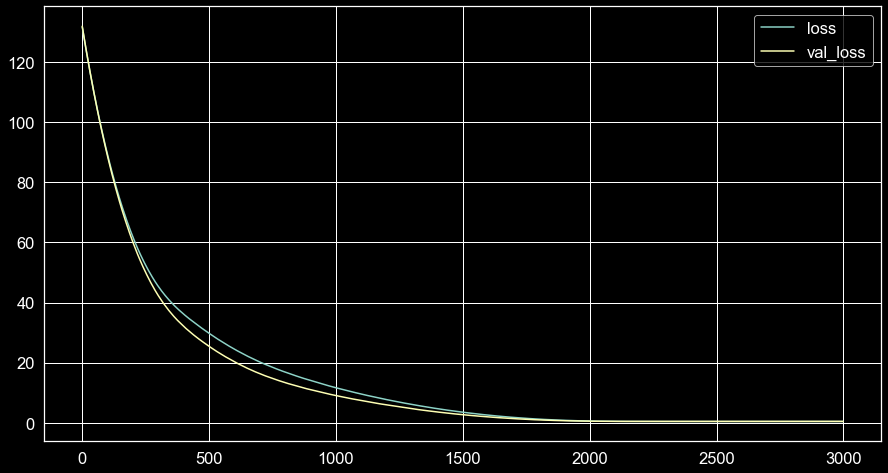

In [16]:
pd.DataFrame(hist).plot()

In [17]:
weights=model.layers[0].get_weights()[0]
biases=model.layers[0].get_weights()[1]
weights,biases

(array([[-14.816669 ],
        [  5.2038393]], dtype=float32),
 array([14.912592], dtype=float32))

In [18]:
# (array([[-14.827212 ],
#         [  5.2242913]], dtype=float32),
#  array([14.870144], dtype=float32))
# ​

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.layers[0]

In [21]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.4643


0.46426236629486084

In [29]:
# model.save("sreeni_1800epochs_adam.h5")
# model.save("sreeni_3000epochs_adam.h5")

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
pred=model.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(mean_squared_error(y_test,pred))

0.5372075498192627
0.4642623421864783


In [25]:
# 2.646554987403604
# 9.869880555923517 @ 950 epochs SHITE!

In [26]:
# ADAM @ 1800 epochs
# 0.7942758936001035
# 1.0231568916884037

In [27]:
df.mean()

biking           37.788411
smoking          15.435034
heart.disease    10.174538
dtype: float64

# SGD<font color ='plum'> 
# MSE: 0.45138202063390553
# MAE: 0.525869890771895 
</font>

In [28]:
# (array([-14.81400097,   5.22417421]), 14.906953371822128)
# (array([-14.81400097,   5.24488822]), 14.886239364884904) confirmed same with sreeni